In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# loading the dataset to a pandas DataFrame
df = pd.read_csv("C:\\Users\\Rames\\Project\\IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# 5 Rows of the Dataset
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# checking the number of missing values in each columns
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
# distribution of legit transactions and fraudulent transactions
visualization = df['species'].value_counts()
visualization

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<Axes: xlabel='species', ylabel='Count'>

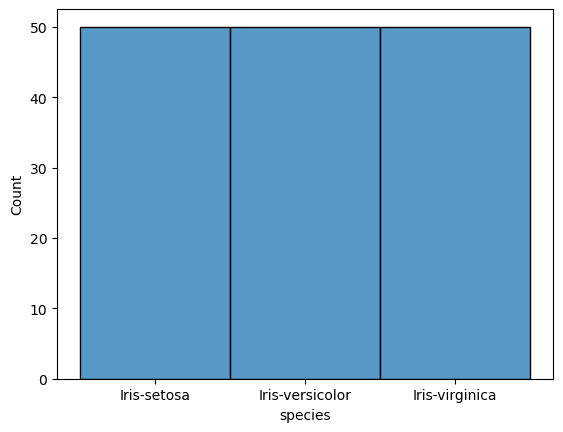

In [7]:
#visualizing the data using histograms
sns.histplot(x = "species",data = df)

In [8]:
#convert species column binary format
en = LabelEncoder()
df["species"] =en.fit_transform(df.species)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
# select column
x = df.iloc[:,[0,1,2,3]]
y = df.iloc[:,[4]]

In [11]:
# Split the dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [12]:
# algorithm like K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [13]:
# training the Logistic Tegression model with Training data
model.fit(x_train,y_train)

I:\Install Sofware\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [14]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [15]:
# accyracy and matrix test data

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
result = confusion_matrix(y_test,y_pred)
print("confusion Matrix : ")
print(result)
print("Accuracy Score : ",accuracy_score(y_test,y_pred))


confusion Matrix : 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy Score :  1.0


In [16]:
# new values for sepal length, sepal width, petal length, and petal width to see the predicted species

k = np.array([[5,35,14,2]])
k.shape

(1, 4)

In [17]:
pred = model.predict(k)
pred

I:\Install Sofware\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

In [18]:
df = pd.read_csv("C:\\Users\\Rames\\Project\\IRIS.csv")
print("Predicted Species:",df['species'][pred[0]])

Predicted Species: Iris-setosa
